# [9660] Local Outlier Factor 1

In [1]:
from datetime import datetime
print(f'Run time: {datetime.now().strftime("%D %T")}')

Run time: 12/02/24 13:18:16


### Import libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager
from sklearn.neighbors import LocalOutlierFactor

### Generate data

In [3]:
np.random.seed(42)     # Only for teaching purposes

xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))

# Generate normal (not abnormal) training observations
X = 0.3 * np.random.randn(100, 2)
X_train = np.r_[X + 2, X - 2]

# Generate new normal observations
X = 0.3 * np.random.randn(20, 2)
X_test = np.r_[X + 2, X - 2]

# Generate new abnormal observations
X_outliers = np.random.uniform(low=-5, high=5, size=(20, 2))

### Plot data

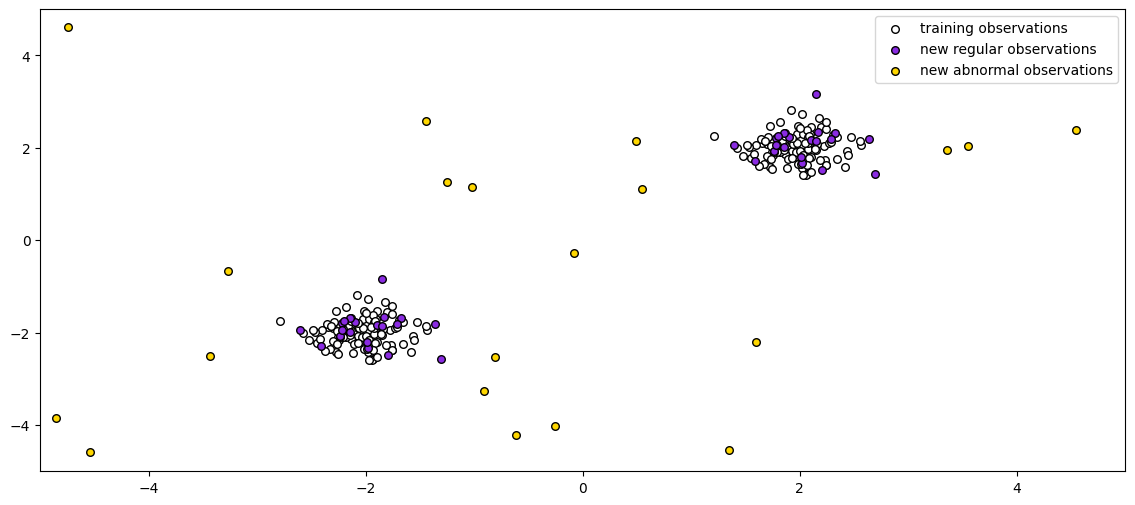

In [4]:
# Define plot size
plt.figure(figsize=(14, 6))

s = 30
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white', s=s, edgecolors='k')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='blueviolet', s=s,
                 edgecolors='k')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='gold', s=s,
                edgecolors='k')

plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))

# Create legend
plt.legend([b1, b2, c],
           ["training observations",
            "new regular observations",
            "new abnormal observations"],
           loc="best",
           prop=font_manager.FontProperties(size=10))

plt.show()

### Train local outlier factor (LOF) model

In [5]:
# Instantiate LOF model and review default hyperparameters
clf = LocalOutlierFactor()
clf.get_params()

{'algorithm': 'auto',
 'contamination': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 20,
 'novelty': False,
 'p': 2}

In [6]:
# Instantiate LOF model for novelty detection (novelty=True)
clf = LocalOutlierFactor(novelty=True)

In [7]:
# Fit LOF model for novelty detection
clf.fit(X_train)

LocalOutlierFactor(novelty=True)

### Predict new observations

In [8]:
# Make predictions on new normal observations
y_pred_test = clf.predict(X_test)

# Make predictions on new abnormal observations
y_pred_outliers = clf.predict(X_outliers)

### Plot the data highlighting the learned neighborhoods and the contours

<ipython-input-9-0a1594a6d175>:29: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  plt.legend([a.collections[0], b1, b2, c],


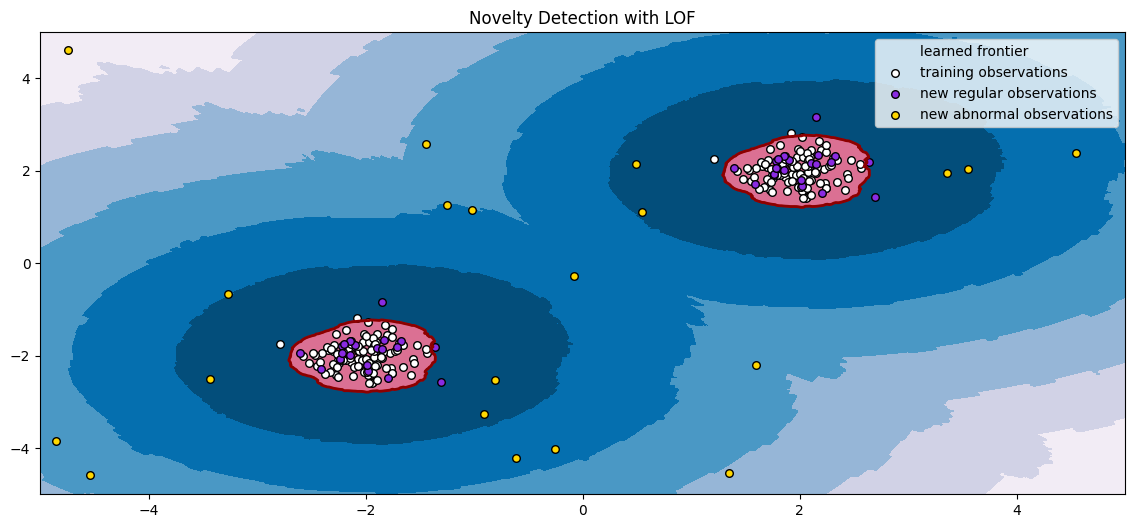

In [9]:
# Compute the anomaly score (local outlier factor) for each observation
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Define plot size and plot title
plt.figure(figsize=(14, 6))
plt.title("Novelty Detection with LOF")

# Plot contours and scatter points
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')

# Highlight the learned frontier
plt.contour(xx, yy, Z, levels=[Z.min(), 0], colors='red')

s = 30
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white', s=s, edgecolors='k')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='blueviolet', s=s,
                 edgecolors='k')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='gold', s=s,
                edgecolors='k')

plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))

# Create legend
plt.legend([a.collections[0], b1, b2, c],
           ["learned frontier", "training observations",
            "new regular observations", "new abnormal observations"],
           loc="best",
           prop=font_manager.FontProperties(size=10))

plt.show()